# Plot when the S&P500 has been up at least 5%

In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# core
import time
import sys
from concurrent.futures import ProcessPoolExecutor

# installed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# custom
sys.path.append('../../code')
import data_processing as dp
import short_squeeze_eda as sse
from utils import get_home_dir
HOME_DIR = get_home_dir(repo_name='scrape_stocks')

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/usr/local/lib/python3.6/dist-packages/odo/backends/pandas.py:94: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access NaTType as type(pandas.NaT)
  @convert.register((pd.Timestamp, pd.Timedelta), (pd.tslib.NaTType, type(None)))


In [3]:
dfs, sh_int, fin_sh = dp.load_stocks(stocks=None,
                                     verbose=True,
                                     short_interest=False,
                                     TAs=False,
                                     finra_shorts=False,
                                     earliest_date=None)

loading stocks...


In [4]:
len(dfs.keys())

11641

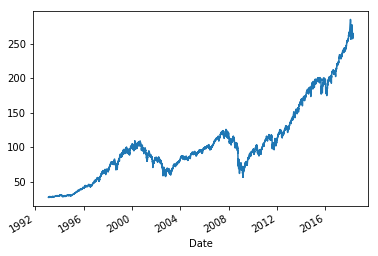

In [5]:
_ = dfs['SPY']['Adj_Close'].plot()

In [6]:
df = dfs['SPY'].copy()

In [7]:
past_days = 1
col = 'Adj_Close'

In [8]:
df[col + 'prev_price_' + str(past_days) + '_days'] = df.iloc[:-past_days][col].tolist() + past_days * [np.nan]

In [9]:
def calc_pct_change(df, past_days=1, col='Adj_Close'):
    """
    calculates the percent change of a stock from past_days days in the past
    """
    df_copy = df.copy()
    prev_price_col = col + '_prev_price_' + str(past_days) + '_days'
    pct_change_col = col + '_pct_change_' + str(past_days) + '_days'
    df_copy[prev_price_col] = past_days * [np.nan] + df_copy.iloc[:-past_days][col].tolist()
    pct_changes = []
    for i, r in df_copy.iloc[past_days:].iterrows():
        pct_changes.append((r[col] - r[prev_price_col]) / r[prev_price_col])
    
    df_copy[pct_change_col] = past_days * [np.nan] + pct_changes
    return df_copy

In [10]:
df = calc_pct_change(dfs['SPY'])

In [11]:
df.head()

,Ticker,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,Adj_Close_prev_price_1_days,Adj_Close_pct_change_1_days
Date,,,,,,,,,,,,,,,
1993-01-29,SPY,43.9687,43.9687,43.7500,43.9375,1003200.0,0.0,1.0,27.376159,27.376159,27.239990,27.356733,1003200.0,NaN,NaN
1993-02-01,SPY,43.9687,44.2500,43.9687,44.2500,480500.0,0.0,1.0,27.376159,27.551304,27.376159,27.551304,480500.0,27.356733,0.007112
1993-02-02,SPY,44.2187,44.3750,44.1250,44.3437,201300.0,0.0,1.0,27.531816,27.629133,27.473476,27.609644,201300.0,27.551304,0.002118
1993-02-03,SPY,44.4062,44.8437,44.3750,44.8125,529400.0,0.0,1.0,27.648559,27.920959,27.629133,27.901533,529400.0,27.609644,0.010572
1993-02-04,SPY,44.9687,45.0937,44.4687,45.0000,531500.0,0.0,1.0,27.998787,28.076616,27.687473,28.018275,531500.0,27.901533,0.004184


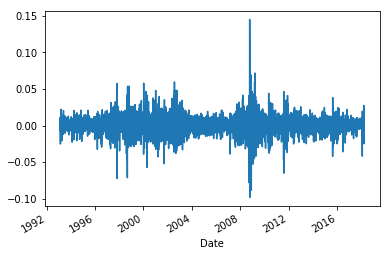

In [12]:
df['Adj_Close_pct_change_1_days'].plot()

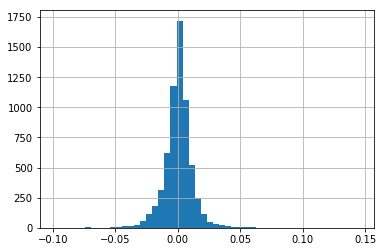

In [13]:
df['Adj_Close_pct_change_1_days'].hist(bins=50)

In [14]:
df = calc_pct_change(dfs['SPY'], past_days=5)

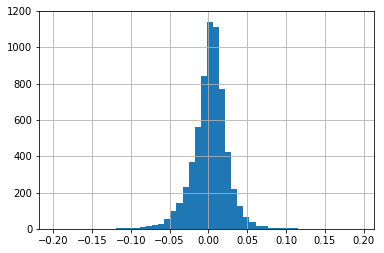

In [15]:
df['Adj_Close_pct_change_5_days'].hist(bins=50)

# idea: predict binary >=0 or arbitrary threshold to get market direction

In [25]:
'BF.B'.replace('.', '_')

'BF_B'

In [32]:
sp500_companies = pd.read_csv('~/github/s-and-p-500-companies/data/constituents.csv')
# need to replace . with _ for consistency with quandl data
sp500_companies['Symbol'] = sp500_companies['Symbol'].apply(lambda x: x.replace('.', '_'))
sp500_companies.sort_values(by='Symbol', inplace=True)

In [33]:
sp500_companies[sp500_companies['Symbol'].str.contains('BF')]

,Symbol,Name,Sector
83,BF_B,Brown-Forman Corp.,Consumer Staples


In [34]:
sp500_companies

,Symbol,Name,Sector
14,A,Agilent Technologies Inc,Health Care
32,AAL,American Airlines Group,Industrials
8,AAP,Advance Auto Parts,Consumer Discretionary
51,AAPL,Apple Inc.,Information Technology
3,ABBV,AbbVie Inc.,Health Care
39,ABC,AmerisourceBergen Corp,Health Care
2,ABT,Abbott Laboratories,Health Care
4,ACN,Accenture plc,Information Technology
7,ADBE,Adobe Systems Inc,Information Technology
44,ADI,"Analog Devices, Inc.",Information Technology


In [ ]:
# add multithreading 
from concurrent.futures import ProcessPoolExecutor

with ProcessPoolExecutor(max_workers=None) as executor:
    for s in ret_stocks:
        r = executor.submit(getattr(cts, TAfunc),
                            dfs[s],
                            return_df=True)
        jobs.append((s, r))

for s, r in jobs:
    res = r.result()
    if res is not None:
        dfs[s] = res
    else:
        print('result is None for', s)

In [35]:
new_dfs = {}
for s in sp500_companies['Symbol']:
    print(s)
    new_dfs[s] = calc_pct_change(dfs[s], past_days=5)

A
AAL
AAP
AAPL
ABBV
ABC
ABT
ACN
ADBE
ADI
ADM
ADP
ADS
ADSK
AEE
AEP
AES
AET
AFL
AGN
AIG
AIV
AIZ
AJG
AKAM
ALB
ALGN
ALK
ALL
ALLE
ALXN
AMAT
AMD
AME
AMG
AMGN
AMP
AMT
AMZN
ANDV
ANSS
ANTM
AON
AOS
APA
APC
APD
APH
APTV
ARE
ARNC
ATVI
AVB
AVGO
AVY
AWK
AXP
AYI
AZO
BA
BAC
BAX
BBT
BBY
BDX
BEN
BF_B
BHF
BHGE
BIIB
BK
BKNG
BLK
BLL
BMY
BRK_B
BSX
BWA
BXP
C
CA
CAG
CAH
CAT
CB
CBOE
CBRE
CBS
CCI
CCL
CDNS
CELG
CERN
CF
CFG
CHD
CHRW
CHTR
CI
CINF
CL
CLX
CMA
CMCSA
CME
CMG
CMI
CMS
CNC
CNP
COF
COG
COL
COO
COP
COST
COTY
CPB
CRM
CSCO
CSRA
CSX
CTAS
CTL
CTSH
CTXS
CVS
CVX
CXO
D
DAL
DE
DFS
DG
DGX
DHI
DHR
DIS
DISCA
DISCK
DISH
DLR
DLTR
DOV
DPS
DRE
DRI
DTE
DUK
DVA
DVN
DWDP
DXC
EA
EBAY
ECL
ED
EFX
EIX
EL
EMN
EMR
EOG
EQIX
EQR
EQT
ES
ESRX
ESS
ETFC
ETN
ETR
EVHC
EW
EXC
EXPD
EXPE
EXR
F
FAST
FB
FBHS
FCX
FDX
FE
FFIV
FIS
FISV
FITB
FL
FLIR
FLR
FLS
FMC
FOX
FOXA
FRT
FTI
FTV
GD
GE
GGP
GILD
GIS
GLW
GM
GOOG
GOOGL
GPC
GPN
GPS
GRMN
GS
GT
GWW
HAL
HAS
HBAN
HBI
HCA
HCP
HD
HES
HIG
HII
HLT
HOG
HOLX
HON
HP
HPE
HPQ
HRB
HRL
HRS
HSIC
HST
HSY
HUM
IBM
IC

In [36]:
new_dfs['SPY'] = calc_pct_change(dfs['SPY'], past_days=5)
new_dfs['UVXY'] = calc_pct_change(dfs['UVXY'], past_days=5)
new_dfs['UPRO'] = calc_pct_change(dfs['UPRO'], past_days=5)

# Calculate correlation with S&P500

In [37]:
from scipy.stats import pearsonr

In [38]:
correlations = []
stocks = []
col = 'Adj_Close_pct_change_5_days'
past_days = 5
spy_len = new_dfs['SPY'].shape[0]
for s in sorted(new_dfs.keys()):
    stocks.append(s)
    max_length = min(new_dfs[s].shape[0], spy_len) - past_days
    correlations.append(pearsonr(new_dfs['SPY'][col].values[-max_length:], new_dfs[s][col].values[-max_length:]))

In [59]:
pearson_corrs = [c[0] for c in correlations]

In [39]:
new_dfs['SPY'][col].values[-max_length:]

array([ 0.00370271,  0.01491247,  0.00642172, ...,  0.0113584 ,
        0.02236077, -0.01303439])

In [40]:
new_dfs[s][col].values[-max_length:]

array([ 0.06578523,  0.07221148,  0.08698454, ...,  0.01209382,
        0.03111111, -0.03041552])

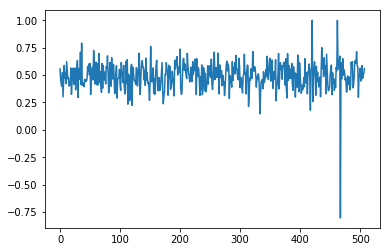

In [41]:
plt.plot([c[0] for c in correlations])

In [42]:
correlations[0]

(0.5560889076042588, 0.0)

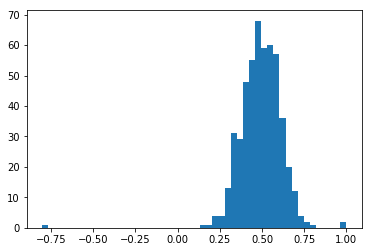

In [43]:
_ = plt.hist([c[0] for c in correlations], bins=50)

In [44]:
np.array(stocks)[np.where(np.array([c[0] for c in correlations]) < 0.3)]

array(['ALXN', 'CHD', 'COO', 'COTY', 'CSRA', 'DVA', 'EVHC', 'LH', 'MNST',
       'NEM', 'PCG', 'PRGO', 'REGN', 'SO', 'SRCL', 'UVXY', 'XEL'],
      dtype='<U5')

6338


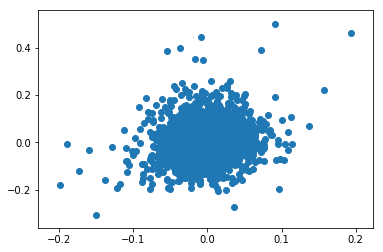

In [45]:
s = 'NEM'
max_length = min(new_dfs[s].shape[0], spy_len) - past_days
print(max_length)
_ = plt.scatter(new_dfs['SPY'][col].values[-max_length:], new_dfs[s][col].values[-max_length:])

5560


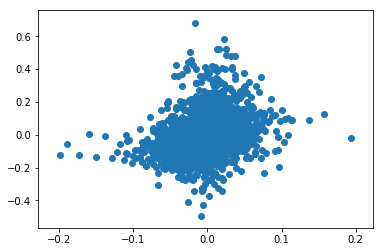

In [46]:
s = 'ALXN'
max_length = min(new_dfs[s].shape[0], spy_len) - past_days
print(max_length)
_ = plt.scatter(new_dfs['SPY'][col].values[-max_length:], new_dfs[s][col].values[-max_length:])

1632
(-0.803785913247939, 0.0)


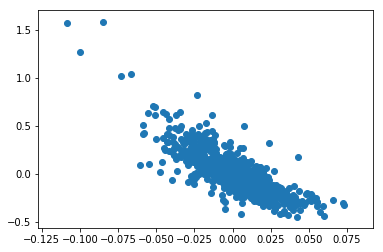

In [47]:
s = 'UVXY'
max_length = min(new_dfs[s].shape[0], spy_len) - past_days
print(max_length)
print(pearsonr(new_dfs['SPY'][col].values[-max_length:], new_dfs[s][col].values[-max_length:]))
_ = plt.scatter(new_dfs['SPY'][col].values[-max_length:], new_dfs[s][col].values[-max_length:])

In [48]:
pearsonr(new_dfs['SPY'][col].values[-max_length:][5:], new_dfs[s][col].values[-max_length:][:-5])

(0.1376195672343035, 2.4995035021312667e-08)

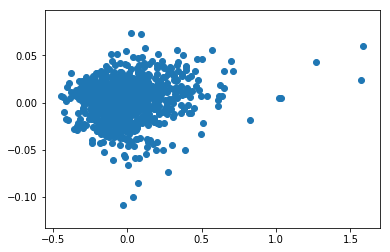

In [49]:
plt.scatter(new_dfs[s][col].values[-max_length:][:-5], new_dfs['SPY'][col].values[-max_length:][5:])

In [50]:
for i in [20, 15, 10, 5, 4, 3, 2, 1]:
    print(pearsonr(new_dfs['SPY'][col].values[-max_length:][i:], new_dfs[s][col].values[-max_length:][:-i]))

print(pearsonr(new_dfs['SPY'][col].values[-max_length:], new_dfs[s][col].values[-max_length:]))

(-0.003785296918149445, 0.8792963613893537)
(0.009857920167442582, 0.6920245022575242)
(0.03491260279048919, 0.15989738684756682)
(0.1376195672343035, 2.4995035021312667e-08)
(-0.05381547596196244, 0.02991013114068115)
(-0.24658650959532108, 5.4580938172561856e-24)
(-0.40868866017376027, 1.1944089472694293e-66)
(-0.6103363496267763, 4.574915771160374e-167)
(-0.803785913247939, 0.0)


In [51]:
dfs['VIXY']

,Ticker,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,,
2011-01-04,VIXY,79.14,81.350,79.1400,79.2300,112000.0,0.0,1.0,7914.00,8135.00,7914.000,7923.00,1120.0
2011-01-05,VIXY,80.05,80.100,77.1800,77.5499,74000.0,0.0,1.0,8005.00,8010.00,7718.000,7754.99,740.0
2011-01-06,VIXY,77.44,78.680,76.8700,77.8800,83000.0,0.0,1.0,7744.00,7868.00,7687.000,7788.00,830.0
2011-01-07,VIXY,77.24,80.010,76.1800,78.0400,43000.0,0.0,1.0,7724.00,8001.00,7618.000,7804.00,430.0
2011-01-10,VIXY,79.64,80.870,77.7600,77.8800,70000.0,0.0,1.0,7964.00,8087.00,7776.000,7788.00,700.0
2011-01-11,VIXY,76.72,77.260,75.5100,75.7260,60500.0,0.0,1.0,7672.00,7726.00,7551.000,7572.60,605.0
2011-01-12,VIXY,74.11,74.270,72.1600,72.3500,44500.0,0.0,1.0,7411.00,7427.00,7216.000,7235.00,445.0
2011-01-13,VIXY,72.28,73.040,71.4900,71.5000,14000.0,0.0,1.0,7228.00,7304.00,7149.000,7150.00,140.0
2011-01-14,VIXY,72.00,72.000,67.8000,68.5500,46500.0,0.0,1.0,7200.00,7200.00,6780.000,6855.00,465.0


2206
(0.9985978472924207, 0.0)


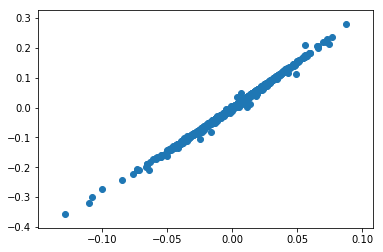

In [52]:
s = 'UPRO'
max_length = min(new_dfs[s].shape[0], spy_len) - past_days
print(max_length)
print(pearsonr(new_dfs['SPY'][col].values[-max_length:], new_dfs[s][col].values[-max_length:]))
_ = plt.scatter(new_dfs['SPY'][col].values[-max_length:], new_dfs[s][col].values[-max_length:])

In [60]:
# sort by correlation
corr_idx = np.argsort(pearson_corrs)[::-1]  # greatest to least correlation

In [62]:
np.array(stocks)[corr_idx][:10]

array(['SPY', 'UPRO', 'AMP', 'DWDP', 'TEL', 'GE', 'AXP', 'MS', 'WYN',
       'IVZ'], dtype='<U5')

In [64]:
np.array(pearson_corrs)[corr_idx[:10]]

array([1.        , 0.99859785, 0.79157549, 0.76130065, 0.7494397 ,
       0.73619157, 0.72430706, 0.71526326, 0.71281898, 0.70918306])

3156
(0.791575489550759, 0.0)


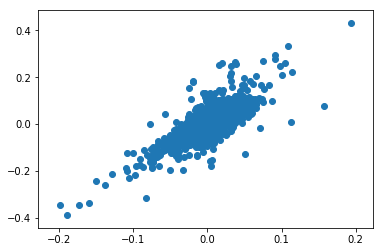

In [65]:
s = 'AMP'
max_length = min(new_dfs[s].shape[0], spy_len) - past_days
print(max_length)
print(pearsonr(new_dfs['SPY'][col].values[-max_length:], new_dfs[s][col].values[-max_length:]))
_ = plt.scatter(new_dfs['SPY'][col].values[-max_length:], new_dfs[s][col].values[-max_length:])